# 27th February - Trade and Platform Analysis

In [2]:
import dunebuggy

In [25]:
import pandas as pd

In [3]:
from dunebuggy import Dune

dune = Dune()

In [ ]:
# ##Query - 2093958
# SELECT DISTINCT EXTRACT(HOUR FROM block_time) AS "Hour",
# COUNT(EXTRACT(HOUR FROM block_time)),
# COUNT(CASE 
# WHEN platform = 'SuperRare' THEN 1
# END) AS "SuperRare",
# COUNT(CASE 
# WHEN platform = 'Rarible' THEN 1
# END) AS "Rarible",
# COUNT(CASE 
# WHEN platform = 'OpenSea' THEN 1
# END) AS "OpenSea",
# COUNT(CASE 
# WHEN platform = 'NFTX' THEN 1
# END) AS "NFTX"
# FROM nft.trades a
# --INNER JOIN nft.trades b
# --ON a.(EXTRACT(HOUR FROM block_time) = b.(EXTRACT(HOUR FROM block_time)
# GROUP BY EXTRACT(HOUR FROM block_time)
# ORDER BY EXTRACT(HOUR FROM block_time) ASC;

In [12]:
plat_traffic = dune.fetch_query(2093958)

In [ ]:
#Query - 2091728
# SELECT Total, Count(Total) AS Count FROM(
# SELECT --DISTINCT(day_of_week(block_time)) AS "dayofweek",
# CASE
# WHEN EXTRACT(HOUR FROM block_time) >= 6 AND
# --date_trunc('hour',block_time) >= '06:00:00.000' AND
#               EXTRACT(HOUR FROM block_time) <= 18
#          THEN 'Day'
# WHEN (EXTRACT(HOUR FROM block_time) > 18 AND
#               EXTRACT(HOUR FROM block_time) <= 23)
#               OR EXTRACT(HOUR FROM block_time) < 6
#          THEN 'Evening'
# END AS Total
# --(COUNT(day_of_week(block_time)) * 100.00/(SELECT COUNT(day_of_week(block_time)) FROM nft."trades")) AS "Total_Count"
# FROM nft."trades") temp
# GROUP BY Total;

In [15]:
day_traffic = dune.fetch_query(2091728)

In [13]:
plat_traffic

<DuneQuery query_id=2093958 name=Hour_wise_traffic length=24 rows>

In [14]:
print(plat_traffic.df)

    Hour   NFTX  OpenSea  Rarible  SuperRare    count
0      0  11287  1885014    11832       1062  1929842
1      1  11362  1956052    11874        934  2001372
2      2  11099  1889758    11286        986  1934080
3      3  10890  1974880    10990        900  2019628
4      4  11466  1894054    10893        931  1939610
5      5  11475  1855020    11407        913  1900483
6      6  10026  1750713    10956        832  1793919
7      7   9154  1604138    10189        857  1643668
8      8   7800  1487463    10035        862  1527019
9      9   7331  1398898    10347        880  1435968
10    10   8159  1414001    11148        911  1452574
11    11   7011  1408680    11119        989  1446483
12    12   8101  1464527    10566        972  1503430
13    13   7830  1543244    11270       1063  1582958
14    14   7401  1631701    10686       1093  1672552
15    15   7746  1694275    12339       1315  1738869
16    16   8654  1765328    11732       1407  1810616
17    17   9008  1830953    

In [16]:
print(day_traffic.df)

     Total     _col1
0  Evening  28173174
1      Day  29000580


In [35]:
from matplotlib import pyplot as plt

<BarContainer object of 2 artists>

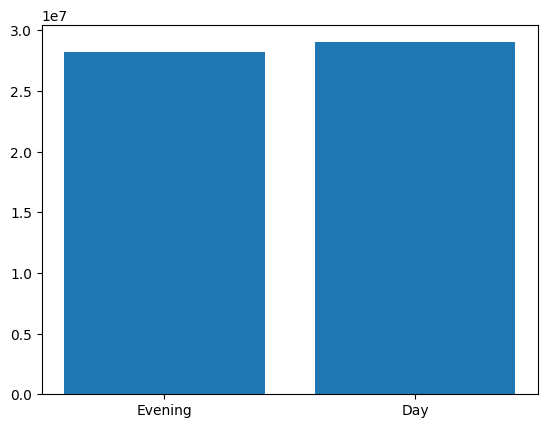

In [17]:
plt.bar(day_traffic.df["Total"], day_traffic.df["_col1"])

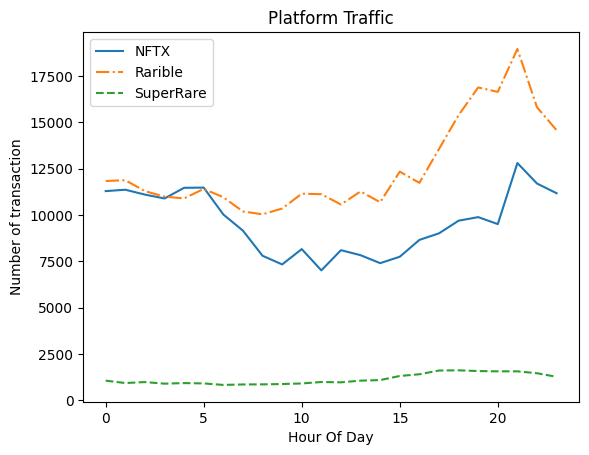

In [21]:
plt.plot(plat_traffic.df["Hour"], plat_traffic.df["NFTX"], label = 'NFTX')
plt.plot(plat_traffic.df["Hour"], plat_traffic.df["Rarible"], '-.', label = 'Rarible')
plt.plot(plat_traffic.df["Hour"], plat_traffic.df["SuperRare"], '--', label = 'SuperRare')
plt.xlabel("Hour Of Day")
plt.ylabel("Number of transaction")
plt.legend()
plt.title('Platform Traffic')
plt.show()

# 6th March - Analysis to differentiate Bots and Human activity

In [ ]:
# Filtering the users who are buying and selling the same NFT within a minute
# ##Query - 2161838
# SELECT * FROM (
# SELECT a.buyer, a.original_amount, b.original_amount,
# --Datediff(hour, a.block_time, b.block_time) time_gap
# (b.block_time - a.block_time) time_gap
# FROM nft.trades a
# INNER JOIN nft.trades b
# ON (a.buyer = b.seller AND a.block_time < b.block_time AND a.nft_token_id = b.nft_token_id )) temp
# WHERE (EXTRACT(MINUTES FROM time_gap)) < 1 AND (EXTRACT(HOURS FROM time_gap)) = 0 AND (EXTRACT(DAYS FROM time_gap)) = 0
# ORDER BY time_gap ASC;

In [4]:
bot_time = dune.fetch_query(2161838)

In [5]:
bot_time.df

,buyer,original_amount,original_amount (1),time_gap
0,\x00000069a7d8f98918898ecddfa27b6dac67b055,0.04500,0.20000,00:00:01
1,\x20c016d298b887dc551975783afc17a3a007330c,0.08697,0.01500,00:00:01
2,\x1ae94af0b6a7c33718d006091b7be2dc3b7186be,0.21000,0.13900,00:00:01
3,\xb3f0771103120f80ee3f2fdedf9c856a3af683b1,0.04000,0.12000,00:00:01
4,\xd396b4b319995b2227f3abe3c170b1affa16dde3,0.52300,0.49000,00:00:01
...,...,...,...,...
3214,\x958b6ac6a7cec484352eb88a8b71fd90df316791,0.04000,0.04490,00:00:59
3215,\xed223ba2c1aab89bdaf01b9fd57ff3835296477d,0.24000,0.14500,00:00:59
3216,\x2bd483077fcc517614b3250fe638efa621a5c6a8,0.20000,0.22000,00:00:59
3217,\x0b45325142b12edfdca445515bd0cb7e9988cf06,0.03000,0.04998,00:00:59


In [10]:
len(bot_time.df.buyer.unique())

1764

In [40]:
delta_2021 = dune.fetch_query(2171133)

In [41]:
delta_2021.df

,block_number,block_time,buyer,category,currency_contract,erc_standard,erc_types_array,erc_values_array,evt_index,evt_type,...,recipients_array,seller,senders_array,trace_address,trade_id,trade_type,tx_from,tx_hash,tx_to,usd_amount
0,16308190,2023-01-01T00:00:11+00:00,\x35c7f81e953c61ab42d0a052f0fadea82fb0f362,Buy Now,\xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,erc721,[],[],0,Trade,...,[],\x37f7be01a006efc949c215c86a8ce51a93f5ac6a,[],[],1,Single Item Trade,\x35c7f81e953c61ab42d0a052f0fadea82fb0f362,\x69e4f6cfa5f51cacaf05ff6fec062c364704736099d8...,\x00000000006c3852cbef3e08e8df289169ede581,59.823000
1,16308190,2023-01-01T00:00:11+00:00,\x0ceecdcfbcbd29c07e0219e9ac0b8de2cb1a3cc4,Offer Accepted,\xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,erc1155,[],[],0,Trade,...,[],\x7c0f98488f4c6f3ac9156470cf1a26e93b94b75f,[],[],1,Single Item Trade,\x7c0f98488f4c6f3ac9156470cf1a26e93b94b75f,\x2edce5d510cc7de69a19c1ec7acca6d255049286792b...,\x00000000006c3852cbef3e08e8df289169ede581,41.876100
2,16308190,2023-01-01T00:00:11+00:00,\xc443727503ff057e36d12f45dad99a8af851c883,Buy Now,\xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,erc721,[],[],0,Trade,...,[],\xa09bc35214e94708e20199179827b561e9c8d24e,[],[],1,Single Item Trade,\xc443727503ff057e36d12f45dad99a8af851c883,\xfd0fce4fb18c26933f646004698a7f910ff5b91f3c92...,\x00000000006c3852cbef3e08e8df289169ede581,14.716458
3,16308193,2023-01-01T00:00:47+00:00,\xd58fb2f5ef1bab92c44f44123026b5c06f698779,Offer Accepted,\xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,erc721,[erc721],[None],277,Trade,...,[\xd58fb2f5ef1bab92c44f44123026b5c06f698779],\x41ac554367a7dd7cbc29c3d84e5cbe34fc69a215,[\x41ac554367a7dd7cbc29c3d84e5cbe34fc69a215],[],1,Single Item Trade,\xd58fb2f5ef1bab92c44f44123026b5c06f698779,\xa69923c7588b81f0187b4e68a47854dce5e15baa227a...,\x59728544b08ab483533076417fbbb2fd0b17ce3a,0.119646
4,16308193,2023-01-01T00:00:47+00:00,\x6522cb212d39b85770a99e1870982f25403a2940,Offer Accepted,\xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,erc721,[erc721],[None],245,Trade,...,[\x6522cb212d39b85770a99e1870982f25403a2940],\x7c9258505bcac5e8b3f0b3cbb375a913660ca57d,[\x7c9258505bcac5e8b3f0b3cbb375a913660ca57d],[],1,Single Item Trade,\x6522cb212d39b85770a99e1870982f25403a2940,\x28fd8f744d2315bc113da5455c1695afe86a2c6bcd6b...,\x59728544b08ab483533076417fbbb2fd0b17ce3a,1527.175895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174894,16782259,2023-03-08T08:09:35+00:00,\x094e654351cf152112e136923ad21508401d64d3,Offer Accepted,\xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,None,"[erc721, erc721, erc721, erc721, erc721, erc72...","[None, None, None, None, None, None, None, None]",194,Trade,...,"[\x094e654351cf152112e136923ad21508401d64d3, \...",\xbab2dceec76271910fead12e649c4cb47045c3cc,"[\x151e5ade1573cbd54a6cc4312a5e63733a1dde35, \...",[],1,Bundle Trade,\x72fc26fb38acb4ce3ede228dfc963560c2b33827,\x27715f4c8a23da6811a8936e6777e06cbb3c0a3c3101...,\x094e654351cf152112e136923ad21508401d64d3,164.471720
174895,16782261,2023-03-08T08:09:59+00:00,\xedbe6ed3426e6c12bf1d1cd4ba06cc620d0800f1,Buy,\xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,erc721,[erc721],[None],76,Trade,...,[\xedbe6ed3426e6c12bf1d1cd4ba06cc620d0800f1],\xb4c5e3211c7c931f4002b50026abb03912f6f55b,[\xb4c5e3211c7c931f4002b50026abb03912f6f55b],[],1,Single Item Trade,\xb4c5e3211c7c931f4002b50026abb03912f6f55b,\x90f57e57fb70610ce2d65b3adbfae2d5ca7860ad21ca...,\x59728544b08ab483533076417fbbb2fd0b17ce3a,63.119902
174896,16782267,2023-03-08T08:11:11+00:00,\x9ebfb53fa8526906738856848a27cb11b0285c3f,Offer Accepted,\xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,None,"[erc721, erc721]","[None, None]",97,Trade,...,"[\x9ebfb53fa8526906738856848a27cb11b0285c3f, \...",\x48729bfb8e09ce440c577701971e317a9058efed,"[\x48729bfb8e09ce440c577701971e317a9058efed, \...",[],1,Bundle Trade,\x72b2196a1fc12fc03540505df1c0c9bc8a7087da,\x203a2b4d386394ffd7da97c7ae1712b8806469576176...,\x9ebfb53fa8526906738856848a27cb11b0285c3f,12.099984
174897,16782271,2023-03-08T08:11:59+00:00,

In [ ]:
# # query - 2171299
# SELECT * FROM(
# SELECT buyer, count(buyer) as counter
# from nft.trades
# WHERE buyer <> '0x0000000000000000000000000000000000000000' AND buyer <> '0x000000000000000000000000000000000000dead'
#       AND buyer <> '\x000000000000000000000000000000000000dead'
# group by buyer, (EXTRACT(HOUR FROM block_time)), (EXTRACT(MINUTE FROM block_time))) temp
# WHERE counter > 1
# ORDER BY buyer, counter DESC
# LIMIT 5000;

In [16]:
hour_buy = dune.fetch_query(2171299)

In [27]:
hourly = pd.DataFrame(hour_buy.df)

In [37]:
results = hourly.groupby(['buyer']).max().sort_values(by=['counter'],ascending=False)

In [ ]:
df.sort_values(by=['col1'])

In [51]:
results.head(10)

,counter
buyer,
\x0000000035634b55f3d99b071b5a354f48e10bef,17180
\x0000000031f7382a812c64b604da4fc520afef4b,16987
\x00000000a50bb64b4bbeceb18715748dface08af,116
\x000000004dfa9ee5293465c56f80069e82b740fa,71
\x000000000097432da963a9d18c10763f302b1033,26
\x000000002e4254f818f89051778f423219de1626,16
\x000000007d905ab8199381328c3fb0a75754b6af,14
\x000000000472549620c30c0aaa241497514dfbfe,14
\x0000000001936a97e5103368eaa5d3f60fe8b5f9,14


In [ ]:
## Query to check buyers who are buying the same nft_token_id, and their portfolio is biased with a single nft
# # Query - 2162145
# SELECT * FROM(
# SELECT buyer, 1.0 * CAST((MAX(count) / COUNT(buyer)) AS DECIMAL(5, 2)) AS Counter FROM
# (SELECT buyer, nft_token_id, COUNT(nft_token_id)
# FROM nft.trades
# GROUP BY buyer, nft_token_id) temp
# --WHERE Counter > 0.8
# GROUP BY buyer
# HAVING COUNT(buyer) <> 0 AND MAX(count) > 10 
# ORDER BY buyer) tmp2
# WHERE Counter > 0.8;

In [48]:
nft_size = dune.fetch_query(2171299)

In [50]:
nft_size.df['buyer']

0       \x000000000000660def84e69995117c0176ba446e
1       \x000000000000660def84e69995117c0176ba446e
2       \x000000000000660def84e69995117c0176ba446e
3       \x000000000000660def84e69995117c0176ba446e
4       \x000000000000660def84e69995117c0176ba446e
                           ...                    
4995    \x00000000a50bb64b4bbeceb18715748dface08af
4996    \x00000000a50bb64b4bbeceb18715748dface08af
4997    \x00000000a50bb64b4bbeceb18715748dface08af
4998    \x00000000a50bb64b4bbeceb18715748dface08af
4999    \x00000000a50bb64b4bbeceb18715748dface08af
Name: buyer, Length: 5000, dtype: object